# YOLO_V3 en Tensor Flow y Darnket usando COCO Dataset
Alberto Gonzalez Isorna

#[A] -- DARKNET -- 

## Instalacion de compiladores, darknet, tensorflow

In [1]:
# nos vamos a Darknet y copiamos el codigo -> Clone
!git clone --quiet https://github.com/AlexeyAB/darknet
  
# actualizamos por si hay cambios 
!apt-get -q update 
!apt-get -q upgrade 

#build-essential is a metapackage (a package that installs many other packages, like g++ and gcc: the GNU C & C++ compilers). 
!apt-get -q install build-essential
!apt-get -q install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev
!apt-get -q install libavcodec-dev libavformat-dev libswscale-d
!apt-get -q install libopencv-dev

%cd darknet
# sed es para cambiar partes de un fichero
!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

!ls
%cd ../
!ls

!apt -q install g++-5
!apt -q install gcc-5

!apt -q update
!apt -q upgrade

# importamos tensorflow
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version

%cd darknet
!wget https://pjreddie.com/media/files/yolov3.weights
!make

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [795 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports I

/device:GPU:0
'sup!'
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130
/content/darknet
--2019-12-12 22:46:19--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  74.7MB/s    in 3.2s    

2019-12-12 22:46:22 (74.7 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o ob

## Imagenes de ejemplo


In [0]:
def imsave():
  import cv2
  image = cv2.imread('predictions.jpg')
  return image
  
def imshow2(im):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = im
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF

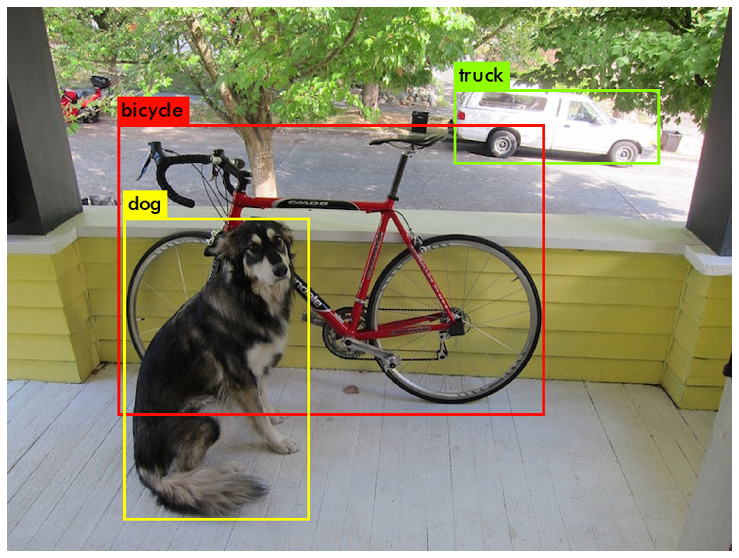

In [3]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
im1 = imsave()
imshow2(im1)

#[0] - Cargamos los datasets

In [4]:
%%shell
cp scripts/get_coco_dataset.sh data
cd data
bash get_coco_dataset.sh

Cloning into 'coco'...
remote: Enumerating objects: 959, done.
remote: Total 959 (delta 0), reused 0 (delta 0), pack-reused 959
Receiving objects: 100% (959/959), 11.69 MiB | 26.42 MiB/s, done.
Resolving deltas: 100% (570/570), done.
--2019-12-12 22:47:37--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.147.19
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.147.19|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  16.6MB/s    in 5m 15s  

2019-12-12 22:52:52 (40.9 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]

--2019-12-12 22:52:52--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.32.52
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.32.52|:80... connected.
H

## Change cfg/coco.data config file to point to your data



In [5]:
!git clone https://github.com/albertosnake/UDE.git
!cp UDE/coco.data data/coco.data

Cloning into 'UDE'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 95 (delta 3), reused 0 (delta 0), pack-reused 84
Unpacking objects: 100% (95/95), done.


## MAP

In [6]:
%cd /
%cd content/darknet
!ls
! ./darknet detector map data/coco.data cfg/yolov3.cfg yolov3.weights

/
/content/darknet
3rdparty      CMakeLists.txt	      include		     results
appveyor.yml  darknet		      json_mjpeg_streams.sh  scripts
backup	      DarknetConfig.cmake.in  LICENSE		     src
build	      darknet.py	      Makefile		     UDE
build.ps1     darknet_video.py	      net_cam_v3.sh	     video_v2.sh
build.sh      data		      obj		     video_yolov3.sh
cfg	      image_yolov2.sh	      predictions.jpg	     yolov3.weights
cmake	      image_yolov3.sh	      README.md
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 -> 

#[B] -- TENSORFLOW --

## Instalacion de yolov3 en Tf

In [7]:
# Librerias representar imagenes
from skimage import data, io
from matplotlib import pyplot as plt

# Librerias Numericas
import numpy as np

# Instalamos yolov3 del repositorio de zzh8829
!git clone https://github.com/zzh8829/yolov3-tf2.git
!pip install -q -r yolov3-tf2/requirements.txt

Cloning into 'yolov3-tf2'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 218 (delta 0), reused 2 (delta 0), pack-reused 215
Receiving objects: 100% (218/218), 2.49 MiB | 5.99 MiB/s, done.
Resolving deltas: 100% (123/123), done.
     |████████████████████████████████| 86.3MB 116kB/s 
     |████████████████████████████████| 28.7MB 8.1MB/s 
     |████████████████████████████████| 3.8MB 63.4MB/s 
     |████████████████████████████████| 450kB 68.1MB/s 
     |████████████████████████████████| 81kB 13.8MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.8.2 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


## Conversion de los pesos preeentrenados de Darknet 

In [8]:
# yolov3
%%shell 
cd yolov3-tf2/ 
# obtenemos los pesos de la libreria de Pjreddie
wget -q https://pjreddie.com/media/files/yolov3.weights -O data/yolov3.weights
# Convertimos los pesos
python convert.py   

2019-12-12 23:02:33.085233: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2019-12-12 23:02:33.089049: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000175000 Hz
2019-12-12 23:02:33.089217: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x24eebc0 executing computations on platform Host. Devices:
2019-12-12 23:02:33.089241: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
Model: "yolov3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
yolo_darknet

## Deteccion (I) - Funciones propias deteccion y representacion

In [0]:
# ----------------------------------------------------------------
# Funcion propia para la deteccion de imagenes o vector de imagenes
def alb_detect(names):
  """
  names = vector con las imagenes
  inIM  = directorio y nombre imagen entrada
  outIM = directorio y nombre imagen salida
  """
  for i in names: 
    inIM="./data/" + i      
    outIM="./output_" + i  
    # hacemos la deteccion
    !python detect.py --image "$inIM" --output "$outIM" --yolo_iou_threshold 0.05
    print('........ > Detection Finished \n')


# ---------------------------------------------------------------
# Funcion para representar imagenes
def alb_represent(names): 
  M = 13
  N = 18
  for i in (names): 
    # Cargamos la imagen
    myim = io.imread("./output_" + i)
    # Representamos la imagen
    #fig, ax = plt.subplots(figsize=(M, N))
    fig, ax = plt.subplots()
    io.imshow(myim)
    plt.title(i)
    plt.show()

# Funcion para representar imagenes
def alb_represent2(names): 
  M = 13
  N = 18
  for i in (names): 
    # Cargamos la imagen
    outIM="data/output_alberto.jpg" 
    myim = io.imread(outIM)
    # Representamos la imagen
    #fig, ax = plt.subplots(figsize=(M, N))
    fig, ax = plt.subplots()
    io.imshow(myim)
    plt.rcParams['figure.figsize'] = [M, N]
    plt.title(i)
    plt.show()

### Detectamos imagenes de ejemplo

/content/darknet/yolov3-tf2
2019-12-12 23:02:44.643494: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2019-12-12 23:02:44.647042: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000175000 Hz
2019-12-12 23:02:44.647247: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x20a2bc0 executing computations on platform Host. Devices:
2019-12-12 23:02:44.647278: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
I1212 23:02:50.808790 139834308331392 detect.py:34] weights loaded
I1212 23:02:50.809210 139834308331392 detect.py:37] classes loaded
I1212 23:02:52.197893 139834308331392 detect.py:46] time: 1.3636541366577148
I1212 23:02:52.198095 139834308331392 detect.py:48] detections:
I1212 23:02:52.199218 139834308331392 detect.py:52] 	person, 0.9997696876525879, [0.06754467 0.03718692 0.967988   0.9650

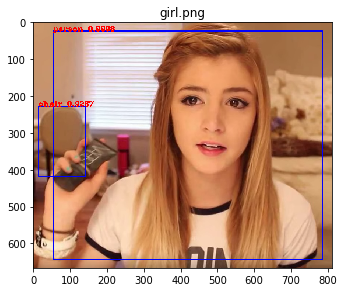

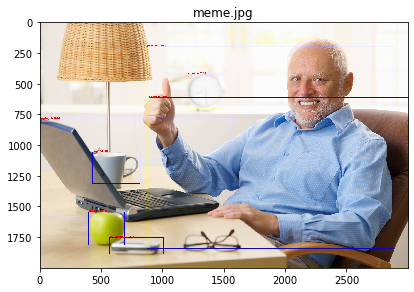

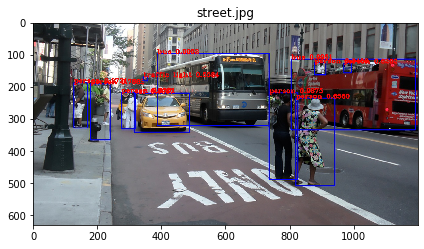

In [10]:
%cd yolov3-tf2/

## No es necesario
names = ['girl.png','meme.jpg','street.jpg']   #vector con los nombres
## detectamos
alb_detect(names) 
## representamos
alb_represent(names)

## Deteccion (II) - Obteniendo resultados de la deteccion

Detect.py -> json

En esta parte incluimos las funciones para generar el json a partir de detect.py 

In [11]:
# DESCARGAMOS mi repo con funciones utiles como get coco dataset
!git clone https://github.com/albertosnake/UDE.git
!cp UDE/fast_detect.py /content/darknet/yolov3-tf2

Cloning into 'UDE'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 95 (delta 3), reused 0 (delta 0), pack-reused 84
Unpacking objects: 100% (95/95), done.


In [0]:
def create_annotation_info(image_id,category_id,bbox,score,shape):

    # convertimos la box string en  una lista de float
    bbox = ((bbox.split('[')[1]).split(']')[0]).split()
    bbox = [float(i) for i in bbox]

    #ajustamos la bbox
    a = bbox
    h = shape[0]
    w = shape[1]
    bbox = [w*a[0], h*a[1], w*(a[2]-a[0]) , h*(a[3]-a[1])]

    # devolvemosn informacion en formato COCO annotations
    annotation_info = {
        "image_id": int(image_id),
        "category_id": int(category_id),
        "bbox": bbox,
        "score": float(score)
    } 
    return annotation_info

In [0]:

# ----------------------------------------------------------------
# Funcion propia para la deteccion de imagenes o vector de imagenes
def detect_return_COCO(names, categories ='data/coco.names', saveout = 0, COCO = 0, bycat = 0):
  """
  names = vector con las imagenes
  categories = fichero .txt con todas las categorias
  saveout = guardamos la imagen detectada
  COCO = 
  bycat = ordenamos por categorias o orden de aparicion
  """
  # counter
  n = 0 

  # jsondata
  import json
  json_data = 0

  # Creamos un array con todos las categorias
  lcat = !cat "$categories";
  lcat = list(lcat)
  

  # Creamos una lista de listas vacia para todas las prob
  if bycat == 1: 
    categories = np.array(lcat)
    n = len(categories)
    d = [[] for x in range(n)]
    # Anadimos los nombres a la primera columna 
    for j in range(n):
      d[j].append(categories[j])

  else:
    d = list()

  # -------- Hacemos un bucle para todas las imagenes
  for i in names: 
    if COCO == 0 :
      image_id = 1
      inIM="./data/" + i  
    else: 
      image_id = int((i.split('2014_')[1]).split('.')[0])
      inIM= i  

    # ------ Hacemos la deteccion (guardando o no el resultado)
    if saveout == 1: 
      outIM="data/output_alberto.jpg" 
      moutput = !python fast_detect.py --image "$inIM" --output "$outIM" --yolo_iou_threshold 0.5 --yolo_score_threshold 0.005;
    else: 
      moutput = !python fast_detect.py --image "$inIM" --yolo_iou_threshold 0.5 --yolo_score_threshold 0.005;

    print('........ > Detection {} Finished \n'.format(n))
    n = n+1

    # Calculamos las detecciones en la foto
    detections = np.array(moutput[8:-1]) #desde la octava fila (la que empieza por detections... a la penultima)
    
    #N = detections.shape[0] #numero de objetos detectados ## no es necesario
    #print(moutput)

    # -- Obtenemos las dimensiones de la imagen
    mshape = str(np.array(moutput[-1])).split('=')[1]
    v = mshape.split()
    mshape = [int(v[1]),int(v[3])]

    # ---- Por cada deteccion anadimos la clase y probabilidad
    for  k in detections:
      beg = k.split("\t")[1]          # quitamos el tiempo 
      aux = (beg.split(", "))[0:3]    # separamos los datos por comas
      mclass = aux[0]                 # obtenemos la clase
      prob = aux[1]                   # obtenemos la probabilidad
      box = aux[2]                    # obtenemos la box predicha
      mindex = lcat.index(mclass)     # obtenemos el indice en los nombres

      # ---- Lo anadimos a la lista d (por categorias o no)
      if bycat==1: 
        d[mindex].append(create_annotation_info(image_id,mindex,box,prob,mshape))
      else: 
        d.append(create_annotation_info(image_id,mindex,box,prob,mshape))

  ### Creamos json
  json_data = json.dumps(d)
  return json_data


## Calculo de la MAP


In [0]:
## Cargamos COCO Dataset
# no necesario si lo hemos hecho en [0]
#%%shell
#cp ../yolov3-tf2/UDE/get_coco_dataset.sh data
#cd data
#bash get_coco_dataset.sh

## Detectamos en COCO y exportamos

In [15]:
%cd yolov3-tf2/

[Errno 2] No such file or directory: 'yolov3-tf2/'
/content/darknet/yolov3-tf2


In [0]:
trainlist = !cat /content/darknet/data/coco/5k.txt

In [17]:
N = 100

#elegimos una parte de las imagenes
img_train = trainlist[0:N] 
#img_train = trainlist

# hacemos la deteccion de las imagenes y lo guardamos como Json
d = detect_return_COCO(img_train, 
                       categories = 'UDE/coco_corregido.names', 
                       saveout=0, 
                       COCO=1,
                       bycat=0)

# formato : json annotation
d

........ > Detection 0 Finished 

........ > Detection 1 Finished 

........ > Detection 2 Finished 

........ > Detection 3 Finished 

........ > Detection 4 Finished 

........ > Detection 5 Finished 

........ > Detection 6 Finished 

........ > Detection 7 Finished 

........ > Detection 8 Finished 

........ > Detection 9 Finished 

........ > Detection 10 Finished 

........ > Detection 11 Finished 

........ > Detection 12 Finished 

........ > Detection 13 Finished 

........ > Detection 14 Finished 

........ > Detection 15 Finished 

........ > Detection 16 Finished 

........ > Detection 17 Finished 

........ > Detection 18 Finished 

........ > Detection 19 Finished 

........ > Detection 20 Finished 

........ > Detection 21 Finished 

........ > Detection 22 Finished 

........ > Detection 23 Finished 

........ > Detection 24 Finished 

........ > Detection 25 Finished 

........ > Detection 26 Finished 

........ > Detection 27 Finished 

........ > Detection 28 Finish

'[{"image_id": 164, "category_id": 81, "bbox": [430.43283199999996, 177.959088, 95.26380800000005, 133.6636176], "score": 0.9619725942611694}, {"image_id": 164, "category_id": 62, "bbox": [145.8064832, 412.335216, 175.56094080000003, 67.58966400000003], "score": 0.9238218069076538}, {"image_id": 164, "category_id": 44, "bbox": [369.5316672, 187.05470400000002, 8.79294080000001, 24.817295999999995], "score": 0.8818140029907227}, {"image_id": 164, "category_id": 44, "bbox": [383.992128, 186.8612496, 8.488320000000016, 23.916604800000005], "score": 0.8670223951339722}, {"image_id": 164, "category_id": 46, "bbox": [96.1327808, 192.818328, 17.560825599999994, 36.226958399999994], "score": 0.8074021935462952}, {"image_id": 164, "category_id": 77, "bbox": [372.63568640000005, 225.3824064, 55.595705599999974, 34.45906560000003], "score": 0.7938663363456726}, {"image_id": 164, "category_id": 46, "bbox": [70.2654272, 196.24536, 17.920633600000002, 36.41979359999999], "score": 0.7611756324768066}

In [18]:
d

'[{"image_id": 164, "category_id": 81, "bbox": [430.43283199999996, 177.959088, 95.26380800000005, 133.6636176], "score": 0.9619725942611694}, {"image_id": 164, "category_id": 62, "bbox": [145.8064832, 412.335216, 175.56094080000003, 67.58966400000003], "score": 0.9238218069076538}, {"image_id": 164, "category_id": 44, "bbox": [369.5316672, 187.05470400000002, 8.79294080000001, 24.817295999999995], "score": 0.8818140029907227}, {"image_id": 164, "category_id": 44, "bbox": [383.992128, 186.8612496, 8.488320000000016, 23.916604800000005], "score": 0.8670223951339722}, {"image_id": 164, "category_id": 46, "bbox": [96.1327808, 192.818328, 17.560825599999994, 36.226958399999994], "score": 0.8074021935462952}, {"image_id": 164, "category_id": 77, "bbox": [372.63568640000005, 225.3824064, 55.595705599999974, 34.45906560000003], "score": 0.7938663363456726}, {"image_id": 164, "category_id": 46, "bbox": [70.2654272, 196.24536, 17.920633600000002, 36.41979359999999], "score": 0.7611756324768066}

## Exportamos a fichero .json

In [0]:
# Creamos el archivo
root = '/content/darknet/data/coco/results/'
middle = '_alberto_'+str(N)
end = 'instances_val2014_bbox_results.json'

resfile = root+middle+end

file = open(resfile, 'w')
file.write(d)
file.close()

## MaP - Librerias y ImgIdlist


In [0]:
# Librerias 
%matplotlib inline
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import numpy as np
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# Vector con los img_ids utilizados
imglist = list()

for i in img_train: 
    image_id = int((i.split('2014_')[1]).split('.')[0])
    imglist.append(image_id)

## MaP - Calculo de la map

In [21]:
annType = ['segm','bbox','keypoints']
annType = annType[1]      #specify type here
prefix = 'person_keypoints' if annType=='keypoints' else 'instances'
print('Running demo for *%s* results.'%(annType))

# ------------ Ground Truth ------------------------
#initialize COCO ground truth api
dataDir='/content/darknet/data/coco'
dataType='val2014'
annFile = '%s/annotations/%s_%s.json'%(dataDir,prefix,dataType) # En nuestro caso instances, val 2014
cocoGt=COCO(annFile)

# ------------ Detecciones ------------------------
#initialize COCO detections api
cocoDt=cocoGt.loadRes(resfile)

# ------------ Lista de imagenes
imgIds = imglist

# ------------- Evaluacion
cocoEval = COCOeval(cocoGt,cocoDt,annType)
cocoEval.params.imgIds  = imgIds
cocoEval.params.iouType = 'bbox'
cocoEval.evaluate()
cocoEval.accumulate()

print('\nResults: \n------------------')
cocoEval.summarize()

Running demo for *bbox* results.
loading annotations into memory...
Done (t=4.95s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.62s).
Accumulating evaluation results...
DONE (t=0.34s).

Results: 
------------------
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.289
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.489
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.307
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.176
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.309
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.418
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.265
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.369
 A

In [0]:
#!cat UDE/coco_corregido.names

#[C] - Comparacion de Bboxes

In [0]:
# seleccionamos una imagen
imgtrain = trainlist[1] 

## Imagen en Darknet

/
/content/darknet
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x

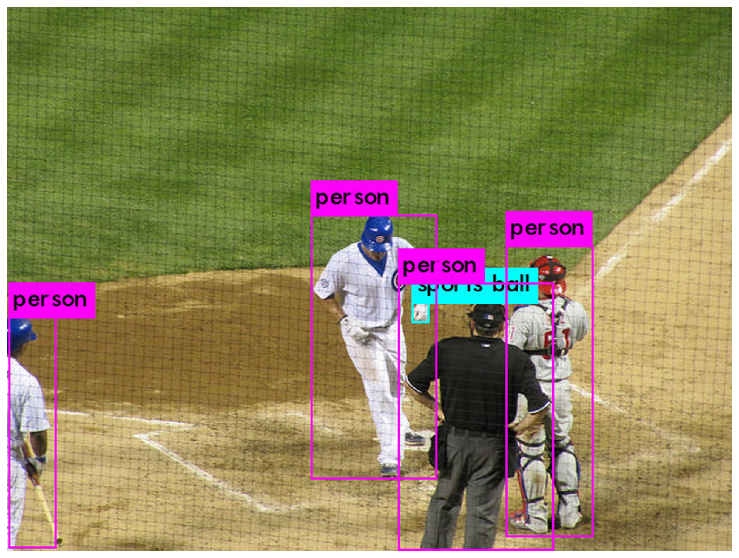

In [24]:
# Imagen en darknet
%cd /
%cd content/darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights "$imgtrain"
im1 = imsave()
imshow2(im1)

## Imagen en TensorFlow

/
/content/darknet/yolov3-tf2
........ > Detection 0 Finished 



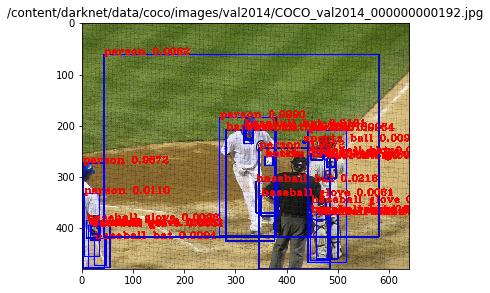

In [25]:
# Imagen en TensorFlow
%cd /
%cd content/darknet/yolov3-tf2/
detect_return_COCO([imgtrain], categories = 'UDE/coco_corregido.names', saveout=1, COCO=1,bycat=0) 
alb_represent2([imgtrain])


#[D] - Conclusiones

## Analisis Cuantitativo

Objetivamente tras el analsis vemos que Darknet es bastante mas rapido que TensoFlow. 

Darknet esta escrita principalmente en CUDA y C, por lo que podemos suponer que Darknet aprovecha bastante mejor la GPU que nos proporciona Google Colab que Tensorflow. 

## Analisis Cualitativo

En cuanto a la calidad de las detecciones, ambos frameworks obtenemos resultados similares. En Tensorflow la MaP es mas baja, debido a nuemerosos factores como que la conversion de pesos no es exacta o los limites y aproximaciones numericos no son los mismos alconstruir la red. 

